In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Getting the Data

In [2]:
train = pd.read_csv("cleaned_train.csv", index_col=0)
test = pd.read_csv("cleaned_test.csv", index_col=0)

Dropping the PassengerId column

In [3]:
train.drop("PassengerId", axis=1, inplace=True)

In [4]:
test.drop("PassengerId", axis=1, inplace=True)

In [5]:
Survived = train["Survived"]

In [6]:
train.drop("Survived", axis=1, inplace=True)

In [7]:
train = pd.concat([train, Survived], axis=1)

Here we scale our data by normalizing it using the StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(train.drop(["Survived"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features = scaler.transform(train.drop(["Survived"], axis=1))

In [12]:
df_features = pd.DataFrame(scaled_features, columns=train.columns[:-1])

In [13]:
df_features.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.827377,-0.552360,0.432793,-0.473674,-0.502445,0.737695,-0.307562,0.619306
1,-1.566107,0.659475,0.432793,-0.473674,0.786845,-1.355574,-0.307562,-1.614710
2,0.827377,-0.249401,-0.474545,-0.473674,-0.488854,-1.355574,-0.307562,0.619306
3,-1.566107,0.432256,0.432793,-0.473674,0.420730,-1.355574,-0.307562,0.619306
4,0.827377,0.432256,-0.474545,-0.473674,-0.486337,0.737695,-0.307562,0.619306


The following cells is the implementation of the knn prediction algorithm

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features,train['Survived'],
                                                    test_size=0.30)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

This is the implementation of the elbow method which helps to select optimal number of neighbors necessary for the knn model by predicting the error rate for a range of n_neighbors values

In [17]:
error_rate = []
for i in range(1,45):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))
    

Text(0,0.5,'Error Rate')

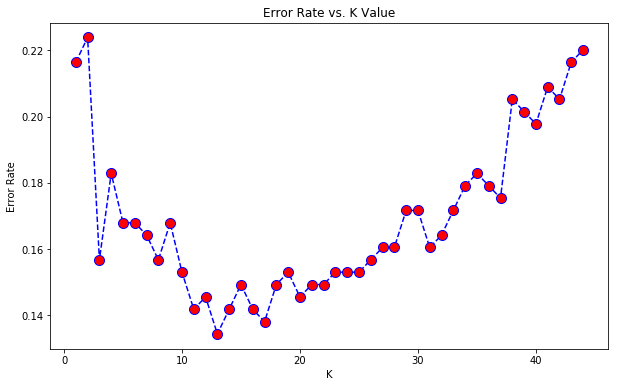

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We select the n_neighbors value as 18

In [21]:
knn = KNeighborsClassifier(n_neighbors=18)

In [22]:
knn.fit(df_features, train["Survived"])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=18, p=2,
           weights='uniform')

In [27]:
scaled_test = scaler.transform(test)

In [28]:
df_test = pd.DataFrame(scaled_test, columns=test.columns[:])

We now output the results from the model and make our submissino in the kaggle competition!


In [30]:
predictions = knn.predict(df_test)

In [32]:
Survived = pd.Series(predictions)

In [37]:
Survived = pd.concat([pd.read_csv("test.csv")["PassengerId"], Survived], axis=1)

In [39]:
Survived.columns = ["PassengerId", "Survived"]

In [41]:
Survived.to_csv("Result_knn_with_elbow.csv", index=False)

In [40]:
Survived

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


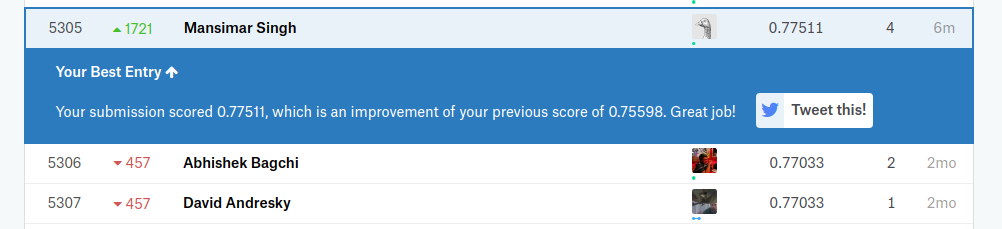

In [1]:
from IPython.core.display import Image 
Image(filename='third_submission_knn.png')


## Now I rank 5305 in the competiton!